In [2]:
import numpy as np
import matplotlib.pyplot as plt
from meerkat_target_selector.sql_conn import Database_Handler

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize='medium', direction = 'in')
plt.rc('ytick', labelsize='medium', direction = 'in')

This notebook will be used to simulate the first few years of MeerKAT commensal technosignature observations. This will help us get an idea of how long it might take us to acheive our goal of observing 1 million stars. To do this, we'll simulate MeerKAT LSP observations, which are projected to be alloted 70% of the observation time on MeerKAT, and random observations, which are alloted the remaining 30% of the observation time on MeerKAT. Because we are unsure of when these observations will scheduled, we'll run these simulations many times and average them to get an idea of how long it will take to observe 1 million sources.

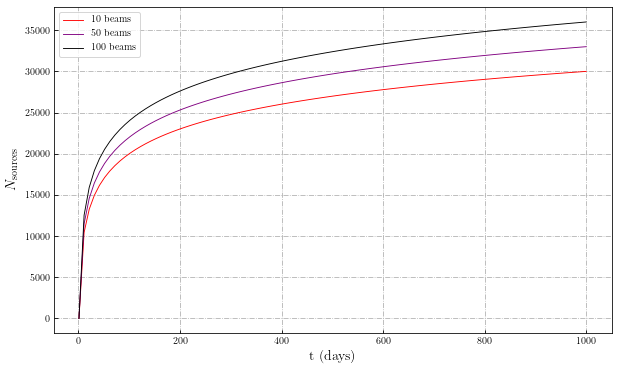

In [10]:
t = np.linspace(1, 1000, 100)

c = ['r', 'purple', 'k']

plt.figure(figsize = (10,6))
plt.plot(t, 10000 * np.log10(t), label = '10 beams', color = c[0], linewidth = 0.9)
plt.plot(t, 11000 * np.log10(t), label = '50 beams', color = c[1], linewidth = 0.9)
plt.plot(t, 12000 * np.log10(t), label = '100 beams', color = c[2], linewidth = 0.9)
plt.xlabel(r't (days)', fontsize=14)
plt.ylabel(r'$N_{\rm sources}$', fontsize=14)
plt.legend()
plt.grid(linestyle='dashdot', zorder=0)
plt.show()
#plt.savefig('example_plot_n_beams.png', bbox_inches='tight')

In [20]:
np.random.uniform(0, 180)

62.695485770456976

Given the information below, it looks like I'll only be able to generate ~30 simulations over a 12 hour period if I run this on multiple threads. I'll need to speed this up if I want a good average. What I can do:

- Run on Breakthrough Listen's head node. I'm assuming it has faster processing than my laptop
- Try filtering sources by reading the target list into memory and searching it that way
- Don't store values into a database, store them in a list and save to npz file.
- Reduce the granulartity by processing the simulation in 30 minute (or more) blocks instead of 5 minute blocks
- For now, include the number of sources within the field of view of a particular pointing and only query the database if the Volume Complete part of the is being used

In [124]:
%timeit [i for i in arr if i in idx]

The slowest run took 8.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 721 µs per loop
